# Lesson 08
# Houda Aynaou

## Workplace Scenario
Mackenzie has a wine bottling factory and recently attended a followup symposium on deep learning and has returned with fascinating ideas to build neural networks to perform classification tasks. She had the idea of building a red-white wine classifier so that the bottle labels can be automatically generated. She approached your team, and suggested that you build a red-white wine classifier as a modified simple perceptron.


## To Do:

For this assignment you will start from the perceptron neural network notebook and modify the python code to make it into a multi-layer neural network classifier. To test your system, use the [RedWhiteWine.csv](https://raw.githubusercontent.com/houdaaynaou/DS-Certificate-UW/master/Course%203%20Machine%20Learning%20Techniques/Data/RedWhiteWine.csv) to an external site. with the goal of building a red or white wine classifier. Use all the features in the dataset, allowing the network to decide how to build the internal weighting system.

Perform each of the following tasks and answer the related questions:

1. Use the provided RedWhiteWine.csv file. Include ALL the features with “Class” being your output vector
2. Use the provided Simple Perceptron Neural Network notebook to develop a multi-layer feed-forward/backpropagation neural network
3. Be able to adjust the following between experiments:
  - Learning Rate
  - Number of epochs
  - Depth of architecture—number of hidden layers between the input and output layers
  Number of nodes in a hidden layer—width of the hidden layers
  (optional) Momentum
4. Determine what the best neural network structure and hyperparameter settings results in the best predictive capability

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Data 

In [0]:
LINK = 'https://raw.githubusercontent.com/houdaaynaou/DS-Certificate-UW/master/Course%203%20Machine%20Learning%20Techniques/Data/RedWhiteWine.csv'
data = pd.read_csv(LINK)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [0]:
# features
features = data.drop('Class', axis = 1)

# output
Y = data.Class.values.T

# Standarizinf the features:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
transformed_features = scaler.fit_transform(features)
X = transformed_features.T


## 2. Logistic (Sigmoid) Function


In [0]:
# Creating a numerically stable logistic s-shaped definition to call
def sigmoid(x):
    x = np.clip(x, -500, 500)
    if x.any()>=0:
        return 1/(1 + np.exp(-x))
    else:
        return np.exp(x)/(1 + np.exp(x))

## 3. Initialize Parameters: layer dimention

In [0]:
# define the dimentions and set the weights to random numbers
def init_parameters(dim1, dim2, std=1e-1, random = True):
    if(random):
        return(np.random.random([dim1,dim2])*std)
    else:
        return(np.zeros([dim1,dim2]))


## 4. Forward Propagation with 2 hidden layers

In [0]:
# 2 layers network: Forward Prop

# Passed in the weight vectors, bias vector, the input vector and the Y
def fwd_prop(W1, W2, bias1, bias2, X, Y):

    # first layer
    Z1 = np.dot(W1,X) + bias1 # dot product of the weights and X + bias
    A1 = sigmoid(Z1)  # Uses sigmoid to create a predicted vector

    # second layer 
    Z2 = np.dot(W2,A1) + bias2 # dot product of the weights and X + bias
    A2 = sigmoid(Z2)  # Uses sigmoid to create a predicted vector

    # return first and second layer forward propagation results
    return(A1, A2)

## 5. Backpropagation with 2 hidden layers

In [0]:
# Two layers network: Backprop

def back_prop(A1, A2, W1, W2, bias1, bias2, X, Y):

    m = np.shape(X)[1] # used the calculate the cost by the number of inputs -1/m
   
    # Cross entropy loss function of the model using A2 (the activation from the last layer)
    cost = (-1/m)*np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2)) # cost of error 
    
    # Optimazing first layer
    dZ1 = A1 - Y                                            # subtract actual from pred weights
    dW1 = (1/m) * np.dot(dZ1, X.T)                          # calc new weight vector
    dBias1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)  # calc new bias vector

    # Optimizing second layer
    dZ2 = A2 - Y                                            # subtract actual from pred weights
    dW2 = (1/m) * np.dot(dZ2, A1.T)                          # calc new weight vector
    dBias2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)  # calc new bias vector
    
    # Optimized weights and biases
    grads ={"dW1": dW1, "dB1":dBias1, "dW2": dW2, "dB2":dBias2} # Weight and biases vectors after backprop
    
    return(grads,cost)

## 6. Gradient Descent

In [0]:
def run_grad_desc(num_epochs, learning_rate, X, Y, n_1):
    
    n_0, m = np.shape(X)
    
    # Weights and Bias for layer 1 
    # Layer with n_0 neurons
    W1 = init_parameters(n_1, n_0, True)
    B1 = init_parameters(n_1,1, True)
    
    # Weights and Bias for layer 2 
    # Layer with 1 neuron
    W2 = init_parameters(1, 1, True)
    B2 = init_parameters(n_1,1, True)

    loss_array = np.ones([num_epochs])*np.nan # resets the loss_array to NaNs
    
    for i in np.arange(num_epochs):
        A1, A2 = fwd_prop(W1, W2, B1, B2, X, Y)         # get predicted vector
        grads,cost = back_prop(A1, A2, W1, W2, B1, B2, X, Y)    # get gradient and the cost from BP 
        
        # Updated Weights and biases for the first layer
        W1 = W1 - learning_rate*grads["dW1"]    # update weight vector LR*gradient*[BP weights]
        B1 = B1 - learning_rate*grads["dB1"]    # update bias LR*gradient[BP bias]

        # Updated Weights and biases for the second layer
        W2 = W2 - learning_rate*grads["dW2"]    # update weight vector LR*gradient*[BP weights]
        B2 = B2 - learning_rate*grads["dB2"]    # update bias LR*gradient[BP bias]
        
        loss_array[i] = cost                    # loss array gets cross ent values
        
        parameter = {"W1":W1,"B1":B1,"W2":W2,"B2":B2}           # assign 
    
    return(parameter,loss_array)

## 7. Runing the neural network



In [0]:
# setting parameters

num_epochs = 1000
learning_rate = 0.01
params, loss_array = run_grad_desc(num_epochs, learning_rate, X, Y, n_1= 1)
print(loss_array[num_epochs-1])

0.477490146581744


## 8. Plot of the loss array

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0) #Set default plot sizes
plt.rcParams['image.interpolation'] = 'nearest' #Use nearest neighbor for rendering

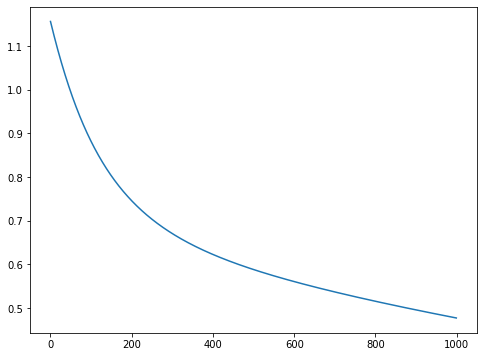

In [0]:
plt.plot(loss_array);

In [0]:
# Hyperparameter tuning

num_epochs = 5000
learning_rate = 0.1
params, loss_array2 = run_grad_desc(num_epochs, learning_rate, X, Y, n_1= 1)
print(loss_array2[num_epochs-1])

0.03493564231646338


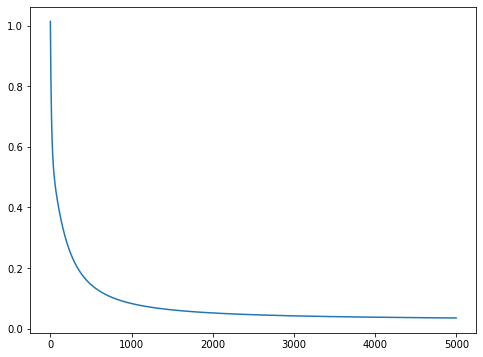

In [0]:
plt.plot(loss_array2);

## The best neural network structure and hyperparameter settings results in the best predictive capability

The second neural network with the following hyperparameters num_epochs = 5000
and learning_rate = 0.1 seems to outperform the first model.